# What is CIFAR-100?
CIFAR-100 is a labeled subset of 80 million tiny images dataset where CIFAR stands for Canadian Institute For Advanced Research. The images were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The dataset consists of 60000 colored images (50000 training and 10000 test) of 32 × 32 pixels in 100 classes grouped into 20 superclasses. Each image has a fine label (class) and a coarse label (superclass).

For more information, you can visit : https://www.cs.toronto.edu/~kriz/cifar.html




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import cifar100
# from tensorflow.keras.datasets.cifar10 import load_data

In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 13s 0us/step


In [5]:
print("There are ", len(X_train), "images in the training dataset and shape: ", X_train.shape)     
print("There are ", len(X_test), "images in the test dataset and shape: ", X_test.shape)

There are  50000 images in the training dataset and shape:  (50000, 32, 32, 3)
There are  10000 images in the test dataset and shape:  (10000, 32, 32, 3)


In [6]:
X_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [7]:
# Checking the shape of one image
X_train[0].shape # the number of channels are 3

(32, 32, 3)

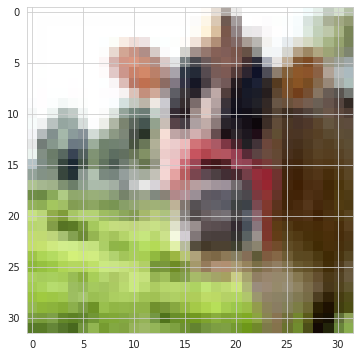

In [8]:
plt.imshow(X_train[0]);
# plt.matshow(X_train[0])

In [9]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[0]   

array([19])

In [12]:
np.unique(y_train, return_counts=True) # 100 classes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 5

In [13]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 1

In [14]:
(np.unique(y_train, return_counts=True)[0] == np.unique(y_test, return_counts=True)[0]).sum()

100

In [15]:
# Dataset class labels
classes =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [16]:
y_train[0]  # 1 --> cattle

array([19])

In [17]:
classes[y_train[0][0]]  # I. way

'cattle'

In [19]:
int(y_train[0])  # converting an array into an integer

19

In [20]:
classes[int(y_train[0])] # II. way

'cattle'

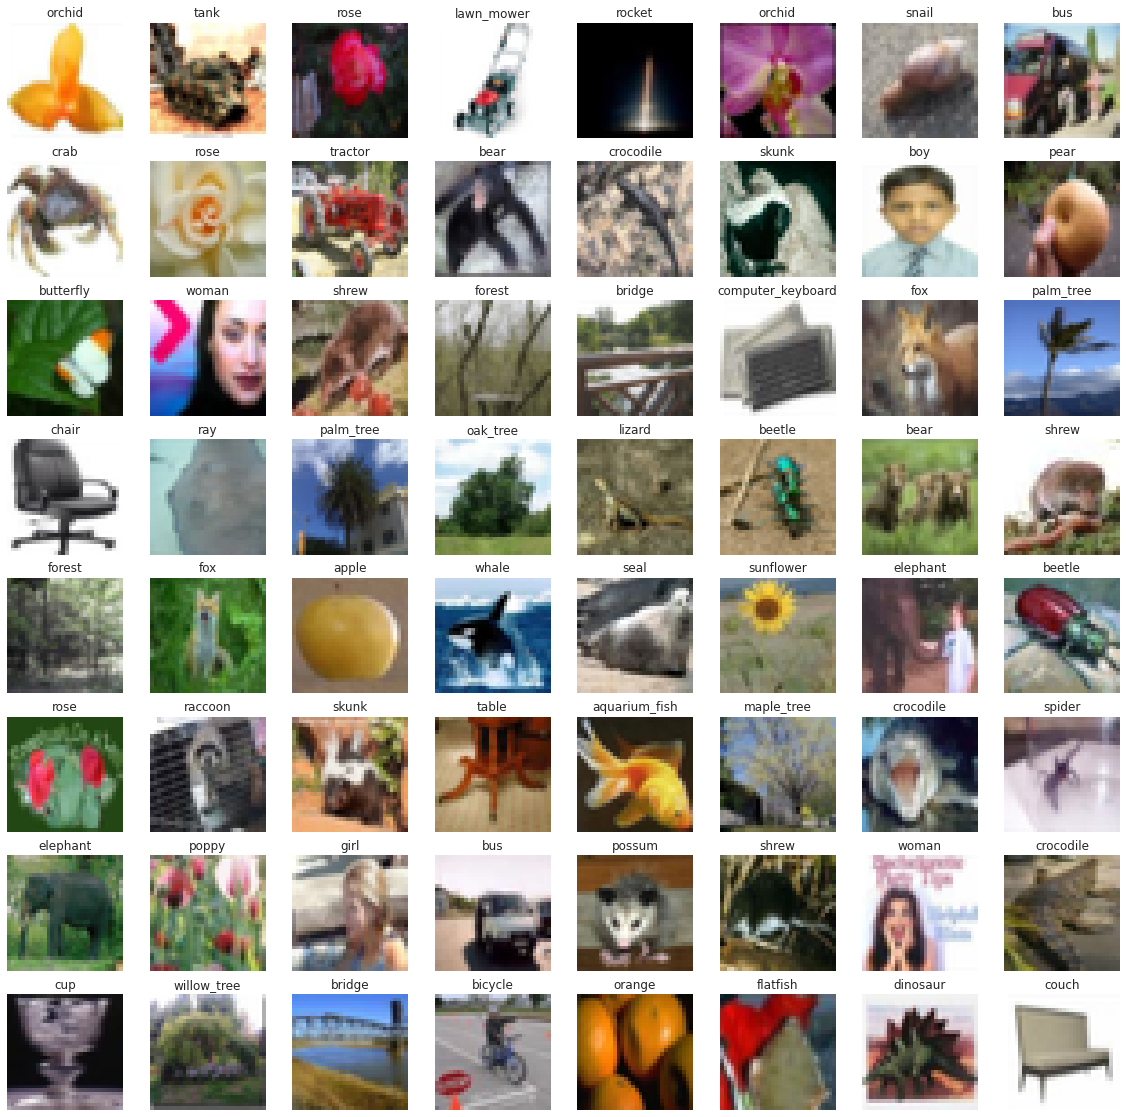

In [21]:
# 64 images randomly from train dataset
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])



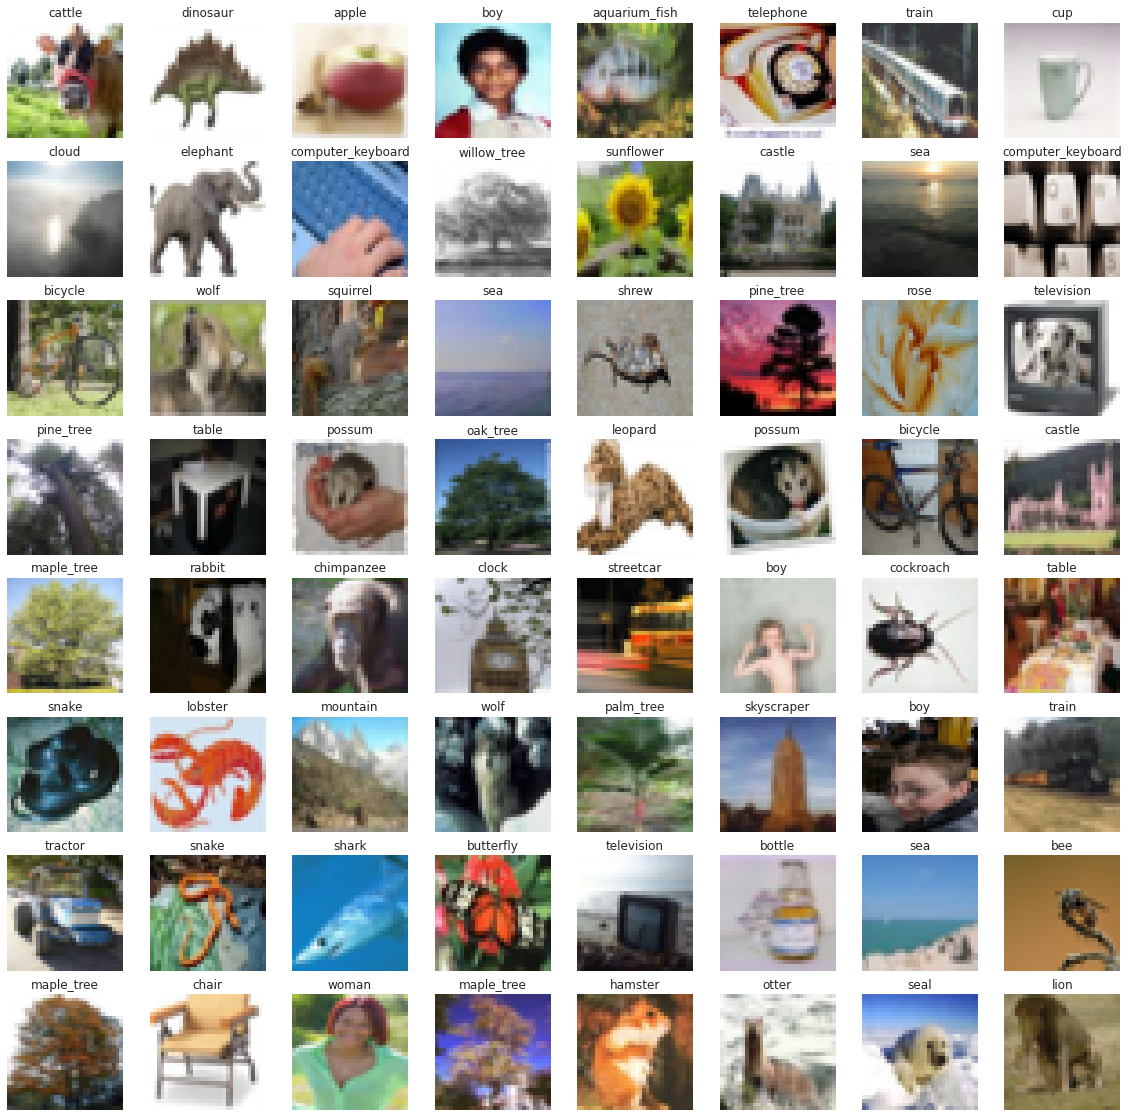

In [22]:
# Visualize several images and their classes from the training set
plt.figure(figsize=(20, 20))

for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.axis('off')
    plt.grid(False)
    plt.title(classes[int(y_train[i])])
    plt.imshow(X_train[i])
    
plt.show()

# Data Preprocessing

In [23]:
# check scaling
X_train[0].min() 

1

In [24]:
X_train[0].max()

255

In [25]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [26]:
X_train[0].min() 

0.003921569

In [27]:
X_train[0].max() 

1.0

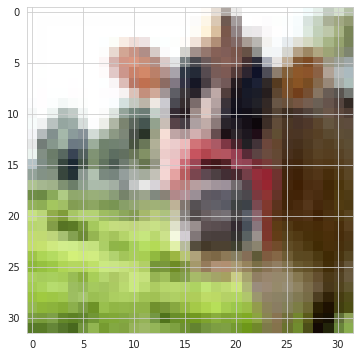

In [29]:
plt.imshow(X_train[0])

In [30]:
## Converts a class vector (integers) to binary class matrix.
# Y_train = to_categorical(y_train, 10)
# Y_test = to_categorical(y_test, 10)
# Y_train.shape, Y_test.shape

In [31]:
# Encoding make column using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer

labelbinarizer = LabelBinarizer()

Y_train = labelbinarizer.fit_transform(y_train)
Y_test = labelbinarizer.transform(y_test)

In [32]:
Y_train.shape, Y_test.shape, y_train.shape, y_test.shape

((50000, 100), (10000, 100), (50000, 1), (10000, 1))

In [36]:
Y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
Y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
y_train[0], y_test[0]

(array([19]), array([49]))

# Modelling-1

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

In [148]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu')) 
model.add(Dense(100, activation='softmax'))  # because of multiclass problems

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [149]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d_21 (Avera  (None, 15, 15, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_22 (Avera  (None, 6, 6, 64)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 average_pooling2d_23 (Avera  (None, 2, 2, 128)       

In [150]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [151]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0007 - accuracy: 0.0834 - val_loss: 3.5941 - val_accuracy: 0.1394
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3839 - accuracy: 0.1854 - val_loss: 3.2302 - val_accuracy: 0.2154
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 3.0584 - accuracy: 0.2422 - val_loss: 2.9855 - val_accuracy: 0.2631
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.8362 - accuracy: 0.2898 - val_loss: 2.8362 - val_accuracy: 0.2932
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6704 - accuracy: 0.3224 - val_loss: 2.8579 - val_accuracy: 0.2835
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5382 - accuracy: 0.3491 - val_loss: 2.6593 - val_accuracy: 0.3292
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4257 - accuracy: 0.3732 - val_loss: 2.7212 - val_accuracy:

## Evaluate Model

In [152]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,4.001,0.083,3.594,0.139
1,3.384,0.185,3.230,0.215
2,3.058,0.242,2.985,0.263
3,2.836,0.290,2.836,0.293
4,2.670,0.322,2.858,0.283


In [153]:
summary.tail()

,loss,accuracy,val_loss,val_accuracy
7,2.316,0.396,2.616,0.342
8,2.228,0.415,2.601,0.360
9,2.136,0.433,2.574,0.359
10,2.053,0.451,2.574,0.362
11,1.971,0.471,2.608,0.360


In [139]:
# # Show Loss and Accuracy Plots
# fig, ax = plt.subplots(1, 2, figsize=(15,5))

# ax[0].plot(summary['loss'], color='b', label="Training Loss")
# ax[0].plot(summary['val_loss'], color='r', label="Validation Loss",axes=ax[0])
# legend = ax[0].legend(loc='best', shadow=True)
# ax[0].set_title('Model Loss')
# ax[0].set_ylabel('Loss') 
# ax[0].set_xlabel('Epoch')

# ax[1].plot(summary['accuracy'], color='b', label="Training Accuracy")
# ax[1].plot(summary['val_accuracy'], color='r', label="Validation Accuracy")
# legend = ax[1].legend(loc='best', shadow=True)
# ax[1].set_title('Model Accuracy')
# ax[1].set_ylabel('Accuracy') 
# ax[1].set_xlabel('Epoch')
# plt.show()

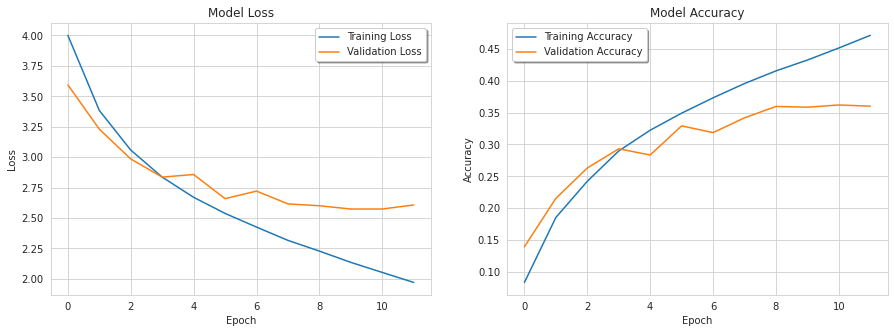

In [154]:
# Show Loss and Accuracy Plots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(summary[["loss", "val_loss"]])
legend = ax[0].legend(["Training Loss","Validation Loss"],loc='best', shadow=True)
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss') 
ax[0].set_xlabel('Epoch')

ax[1].plot(summary[["accuracy", "val_accuracy"]])
legend = ax[1].legend(["Training Accuracy","Validation Accuracy"],loc='best', shadow=True)
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy') 
ax[1].set_xlabel('Epoch')
plt.show()

## Evaluation on Test Data

In [209]:
score1 = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score1[0])    
print('Test accuracy:', score1[1]) 

Test loss: 2.5739598274230957
Test accuracy: 0.35850000381469727


In [156]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[1.1013342e-05, 6.9675874e-04, 3.5069655e-03, ..., 3.1089887e-04,
        3.5862540e-04, 8.5984943e-03],
       [3.4205008e-05, 3.1578518e-03, 1.1926312e-03, ..., 1.3721767e-02,
        1.1762672e-03, 5.3377124e-03],
       [1.9484628e-06, 3.4649833e-04, 8.1155194e-05, ..., 5.7190456e-03,
        2.1120445e-03, 3.6197281e-04],
       ...,
       [9.1423197e-03, 1.1749065e-03, 7.5197598e-04, ..., 3.0192849e-03,
        6.1381108e-04, 4.8065066e-02],
       [2.7549040e-06, 4.7450565e-05, 2.0209311e-02, ..., 4.5359399e-02,
        1.1911338e-02, 3.6724634e-03],
       [1.9743102e-02, 1.6056435e-02, 2.9296726e-03, ..., 1.3730705e-05,
        2.2100487e-03, 1.4133321e-04]], dtype=float32)

In [157]:
y_pred = np.argmax(pred_prob, axis=1)

In [144]:
y_pred 

array([12, 56, 15, ..., 51, 42, 70])

In [145]:
from sklearn.metrics import classification_report, confusion_matrix

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.65      0.56       100
           1       0.41      0.56      0.47       100
           2       0.30      0.21      0.25       100
           3       0.25      0.20      0.22       100
           4       0.17      0.12      0.14       100
           5       0.25      0.20      0.22       100
           6       0.26      0.62      0.37       100
           7       0.45      0.34      0.39       100
           8       0.44      0.26      0.33       100
           9       0.49      0.48      0.49       100
          10       0.18      0.07      0.10       100
          11       0.14      0.28      0.18       100
          12       0.34      0.41      0.37       100
          13       0.26      0.37      0.30       100
          14       0.27      0.24      0.25       100
          15       0.26      0.24      0.25       100
          16       0.39      0.31      0.35       100
          17       0.43    

# Modelling-2

In [163]:
# Let's build a slightly more complex model
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='valid'))
model2.add(AveragePooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid'))
model2.add(AveragePooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
model2.add(AveragePooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu')) 
model2.add(Dense(100, activation='softmax'))  # because of multiclass problems

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [164]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d_27 (Avera  (None, 15, 15, 32)       0         
 gePooling2D)                                                    
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_28 (Avera  (None, 6, 6, 64)         0         
 gePooling2D)                                                    
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)        

In [165]:
model2.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 4.0402 - accuracy: 0.0762 - val_loss: 3.6371 - val_accuracy: 0.1370
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 3.4951 - accuracy: 0.1616 - val_loss: 3.2418 - val_accuracy: 0.2138
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 3.2132 - accuracy: 0.2138 - val_loss: 3.0566 - val_accuracy: 0.2484
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 3.0164 - accuracy: 0.2520 - val_loss: 2.9061 - val_accuracy: 0.2819
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.8651 - accuracy: 0.2812 - val_loss: 2.7634 - val_accuracy: 0.3043
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7450 - accuracy: 0.3033 - val_loss: 2.6853 - val_accuracy: 0.3212
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6468 - accuracy: 0.3250 - val_loss: 2.6140 - val_accuracy:

## Evaluate Model

In [168]:
summary2 = pd.DataFrame(model2.history.history)
summary2.head()

,loss,accuracy,val_loss,val_accuracy
0,4.040,0.076,3.637,0.137
1,3.495,0.162,3.242,0.214
2,3.213,0.214,3.057,0.248
3,3.016,0.252,2.906,0.282
4,2.865,0.281,2.763,0.304


In [169]:
summary2.tail()

,loss,accuracy,val_loss,val_accuracy
10,2.382,0.378,2.491,0.374
11,2.343,0.389,2.444,0.381
12,2.295,0.397,2.401,0.393
13,2.252,0.405,2.406,0.388
14,2.216,0.416,2.406,0.387


In [ ]:
# # Show Loss and Accuracy Plots
# fig, ax = plt.subplots(1, 2, figsize=(15,5))

# ax[0].plot(summary['loss'], color='b', label="Training Loss")
# ax[0].plot(summary['val_loss'], color='r', label="Validation Loss",axes=ax[0])
# legend = ax[0].legend(loc='best', shadow=True)
# ax[0].set_title('Model Loss')
# ax[0].set_ylabel('Loss') 
# ax[0].set_xlabel('Epoch')

# ax[1].plot(summary['accuracy'], color='b', label="Training Accuracy")
# ax[1].plot(summary['val_accuracy'], color='r', label="Validation Accuracy")
# legend = ax[1].legend(loc='best', shadow=True)
# ax[1].set_title('Model Accuracy')
# ax[1].set_ylabel('Accuracy') 
# ax[1].set_xlabel('Epoch')
# plt.show()

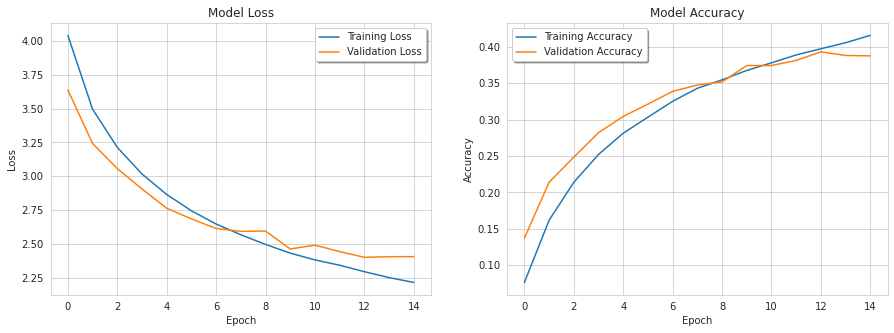

In [170]:
# Show Loss and Accuracy Plots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(summary2[["loss", "val_loss"]])
legend = ax[0].legend(["Training Loss","Validation Loss"],loc='best', shadow=True)
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss') 
ax[0].set_xlabel('Epoch')

ax[1].plot(summary2[["accuracy", "val_accuracy"]])
legend = ax[1].legend(["Training Accuracy","Validation Accuracy"],loc='best', shadow=True)
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy') 
ax[1].set_xlabel('Epoch')
plt.show()

## Evaluation on Test Data

In [210]:
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score2[0])    
print('Test accuracy:', score2[1]) 

Test loss: 2.4011595249176025
Test accuracy: 0.3930000066757202


In [176]:
pred_prob = model2.predict(X_test)
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[5.48406242e-05, 6.02092477e-04, 1.56995971e-02, ...,
        1.73932058e-03, 1.24009396e-03, 2.20471192e-02],
       [7.11966265e-07, 1.39965035e-04, 3.41371997e-05, ...,
        1.39314719e-02, 1.18468655e-04, 3.26994853e-03],
       [8.24686285e-05, 5.98666549e-04, 1.47879252e-03, ...,
        2.39348924e-03, 5.54033672e-04, 6.23753818e-04],
       ...,
       [3.58888879e-04, 3.29209678e-03, 2.68128633e-06, ...,
        7.04868056e-04, 5.25707446e-06, 2.89501380e-02],
       [8.65754100e-06, 7.00571982e-05, 1.36360922e-03, ...,
        1.35702426e-02, 1.29884423e-03, 8.75708763e-04],
       [3.27151977e-02, 2.12019659e-03, 2.45255907e-03, ...,
        3.28826928e-07, 3.07076541e-03, 3.59223085e-03]], dtype=float32)

In [177]:
y_pred = np.argmax(pred_prob, axis=1)

In [178]:
y_pred 

array([30, 33, 34, ..., 51, 42, 45])

In [179]:
from sklearn.metrics import classification_report, confusion_matrix

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       100
           1       0.42      0.51      0.46       100
           2       0.32      0.29      0.30       100
           3       0.22      0.16      0.18       100
           4       0.21      0.30      0.25       100
           5       0.25      0.37      0.30       100
           6       0.42      0.45      0.44       100
           7       0.59      0.37      0.45       100
           8       0.44      0.35      0.39       100
           9       0.48      0.49      0.48       100
          10       0.37      0.14      0.20       100
          11       0.27      0.31      0.29       100
          12       0.35      0.56      0.43       100
          13       0.30      0.36      0.33       100
          14       0.43      0.25      0.32       100
          15       0.36      0.26      0.30       100
          16       0.59      0.33      0.42       100
          17       0.63    

# Modelling-3

In [182]:
from tensorflow.keras.layers import BatchNormalization
# In cnn, batch normalization is more preferred than dropout.

In [183]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(AveragePooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(AveragePooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(AveragePooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(100, activation='softmax'))

model3.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [184]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 average_pooling2d_30 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                     

In [185]:
model3.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 21s 11ms/step - loss: 3.8183 - accuracy: 0.1223 - val_loss: 3.6805 - val_accuracy: 0.1487
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 3.0275 - accuracy: 0.2492 - val_loss: 3.2251 - val_accuracy: 0.2163
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.5893 - accuracy: 0.3335 - val_loss: 2.3268 - val_accuracy: 0.3910
Epoch 4/50
1563/1563 [==============================] - 15s 9ms/step - loss: 2.3133 - accuracy: 0.3895 - val_loss: 2.1192 - val_accuracy: 0.4339
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.1171 - accuracy: 0.4310 - val_loss: 2.0953 - val_accuracy: 0.4478
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9643 - accuracy: 0.4691 - val_loss: 1.8476 - val_accuracy: 0.5053
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8401 - accuracy: 0.4943 - val_loss: 1.8349 - val_

## Evaluate Model

In [186]:
summary3 = pd.DataFrame(model3.history.history)
summary3.head()

,loss,accuracy,val_loss,val_accuracy
0,3.818,0.122,3.680,0.149
1,3.027,0.249,3.225,0.216
2,2.589,0.333,2.327,0.391
3,2.313,0.390,2.119,0.434
4,2.117,0.431,2.095,0.448


In [194]:
summary3.tail()

,loss,accuracy,val_loss,val_accuracy
12,1.393,0.599,1.643,0.563
13,1.335,0.615,1.764,0.540
14,1.296,0.625,1.621,0.571
15,1.260,0.631,1.632,0.575
16,1.215,0.644,1.710,0.558


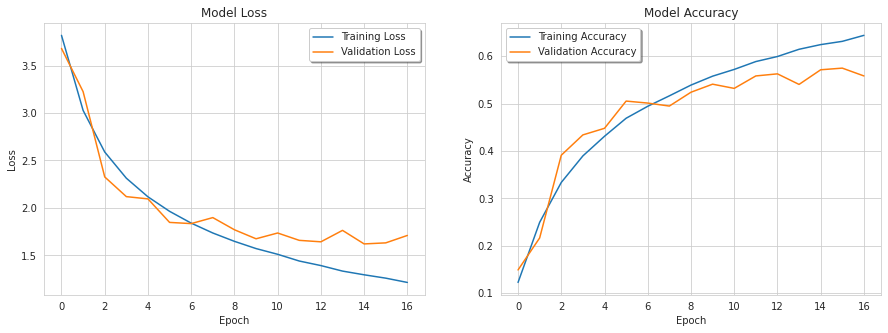

In [187]:
# Show Loss and Accuracy Plots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(summary3[["loss", "val_loss"]])
legend = ax[0].legend(["Training Loss","Validation Loss"],loc='best', shadow=True)
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss') 
ax[0].set_xlabel('Epoch')

ax[1].plot(summary3[["accuracy", "val_accuracy"]])
legend = ax[1].legend(["Training Accuracy","Validation Accuracy"],loc='best', shadow=True)
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy') 
ax[1].set_xlabel('Epoch')
plt.show()

## Evaluation on Test Data

In [246]:
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score3[0])    
print('Test accuracy:', score3[1]) 

Test loss: 1.6209572553634644
Test accuracy: 0.571399986743927


In [247]:
pred_prob = model3.predict(X_test)
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[5.77814205e-07, 2.48169745e-05, 2.40723573e-04, ...,
        1.99463917e-04, 4.84722550e-04, 1.74215107e-04],
       [1.92424286e-05, 5.57271687e-06, 7.70076658e-05, ...,
        9.58377775e-03, 6.66281267e-05, 1.22640758e-05],
       [1.43920076e-07, 1.56420119e-05, 8.71525390e-06, ...,
        6.70532318e-05, 5.18254928e-05, 7.57927264e-05],
       ...,
       [4.54849610e-03, 1.47670420e-04, 8.99228053e-06, ...,
        2.77786166e-05, 8.72470252e-07, 1.24375348e-03],
       [9.86603482e-06, 1.09566845e-05, 1.08801833e-05, ...,
        6.18024613e-04, 2.64125247e-05, 6.34388952e-03],
       [2.17082605e-04, 1.61867702e-05, 3.82100507e-06, ...,
        1.16406397e-07, 6.21417882e-07, 6.90082175e-07]], dtype=float32)

In [248]:
y_pred = np.argmax(pred_prob, axis=1)

In [249]:
y_pred 

array([90, 33, 30, ..., 51, 78, 70])

In [250]:
y_test.flatten()

array([49, 33, 72, ..., 51, 42, 70])

In [252]:
(y_test.flatten() != y_pred).sum()  # 4286 false prediction

4286

In [192]:
from sklearn.metrics import classification_report, confusion_matrix

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.60      0.73      0.66       100
           2       0.36      0.43      0.39       100
           3       0.44      0.27      0.33       100
           4       0.40      0.37      0.39       100
           5       0.64      0.56      0.60       100
           6       0.71      0.65      0.68       100
           7       0.50      0.61      0.55       100
           8       0.80      0.67      0.73       100
           9       0.74      0.76      0.75       100
          10       0.52      0.43      0.47       100
          11       0.36      0.40      0.38       100
          12       0.61      0.69      0.65       100
          13       0.56      0.51      0.53       100
          14       0.48      0.47      0.48       100
          15       0.61      0.63      0.62       100
          16       0.57      0.64      0.60       100
          17       0.73    

In [253]:
confusion_matrix(y_test, y_pred)

array([[79,  0,  0, ...,  0,  0,  0],
       [ 0, 73,  0, ...,  0,  0,  1],
       [ 2,  1, 43, ...,  0,  4,  0],
       ...,
       [ 0,  0,  0, ..., 54,  0,  0],
       [ 0,  0, 11, ...,  0, 30,  1],
       [ 0,  0,  0, ...,  0,  0, 63]])

# Modelling-4

In [196]:
from tensorflow.keras.layers import BatchNormalization
# In cnn, batch normalization is more preferred than dropout.

In [197]:
model4 = Sequential()

model4.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(AveragePooling2D(pool_size=(2,2)))
# model4.add(Dropout(0.2))

model4.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(AveragePooling2D(pool_size=(2,2)))
# model4.add(Dropout(0.2))

model4.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(AveragePooling2D(pool_size=(2,2)))
# model4.add(Dropout(0.2))

model4.add(Flatten())

model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
# model4.add(Dropout(0.2))
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
# model4.add(Dropout(0.2))
model4.add(Dense(100, activation='softmax'))

model4.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [198]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 average_pooling2d_33 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                     

In [199]:
model4.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 21s 13ms/step - loss: 3.5503 - accuracy: 0.1658 - val_loss: 3.0801 - val_accuracy: 0.2542
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.6203 - accuracy: 0.3346 - val_loss: 2.4217 - val_accuracy: 0.3725
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.1064 - accuracy: 0.4394 - val_loss: 2.0768 - val_accuracy: 0.4524
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7575 - accuracy: 0.5189 - val_loss: 1.9702 - val_accuracy: 0.4835
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4748 - accuracy: 0.5856 - val_loss: 1.9316 - val_accuracy: 0.5011
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2204 - accuracy: 0.6460 - val_loss: 2.0187 - val_accuracy: 0.4953
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9923 - accuracy: 0.7046 - val_loss: 2.0680 - val_

## Evaluate Model

In [200]:
summary4 = pd.DataFrame(model4.history.history)
summary4.head()

,loss,accuracy,val_loss,val_accuracy
0,3.550,0.166,3.080,0.254
1,2.620,0.335,2.422,0.373
2,2.106,0.439,2.077,0.452
3,1.757,0.519,1.970,0.484
4,1.475,0.586,1.932,0.501


In [201]:
summary4.tail()

,loss,accuracy,val_loss,val_accuracy
2,2.106,0.439,2.077,0.452
3,1.757,0.519,1.970,0.484
4,1.475,0.586,1.932,0.501
5,1.220,0.646,2.019,0.495
6,0.992,0.705,2.068,0.504


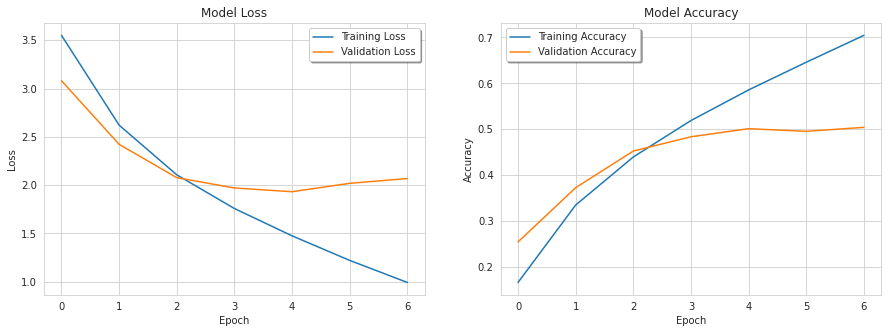

In [202]:
# Show Loss and Accuracy Plots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(summary4[["loss", "val_loss"]])
legend = ax[0].legend(["Training Loss","Validation Loss"],loc='best', shadow=True)
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss') 
ax[0].set_xlabel('Epoch')

ax[1].plot(summary4[["accuracy", "val_accuracy"]])
legend = ax[1].legend(["Training Accuracy","Validation Accuracy"],loc='best', shadow=True)
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy') 
ax[1].set_xlabel('Epoch')
plt.show()

## Evaluation on Test Data

In [212]:
score4 = model4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score4[0])    
print('Test accuracy:', score4[1]) 

Test loss: 1.9316240549087524
Test accuracy: 0.5011000037193298


In [204]:
pred_prob = model4.predict(X_test)
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[3.57440649e-06, 1.13782098e-05, 3.82458209e-04, ...,
        2.18762143e-05, 8.84626570e-05, 8.59757711e-05],
       [2.21723985e-06, 8.34010643e-06, 2.04456795e-04, ...,
        4.26762074e-01, 1.16455427e-04, 3.23189079e-06],
       [6.60367334e-07, 3.83314837e-05, 3.46043234e-04, ...,
        2.62467400e-03, 2.39643431e-03, 5.08993180e-05],
       ...,
       [3.09996284e-03, 1.30326356e-04, 3.46885940e-06, ...,
        4.80576455e-05, 1.90444143e-06, 8.28127086e-04],
       [1.04819235e-04, 6.02589398e-06, 3.02639273e-05, ...,
        5.92410844e-03, 1.62041342e-05, 3.99133889e-03],
       [2.81024058e-05, 1.78217797e-05, 7.10320876e-07, ...,
        7.53111440e-09, 1.71698105e-07, 2.21050534e-04]], dtype=float32)

In [205]:
y_pred = np.argmax(pred_prob, axis=1)

In [206]:
y_pred 

array([68, 97, 30, ..., 51, 45, 70])

In [207]:
from sklearn.metrics import classification_report, confusion_matrix

In [208]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72       100
           1       0.60      0.55      0.58       100
           2       0.39      0.29      0.33       100
           3       0.22      0.29      0.25       100
           4       0.31      0.30      0.30       100
           5       0.62      0.48      0.54       100
           6       0.43      0.66      0.52       100
           7       0.47      0.64      0.54       100
           8       0.65      0.68      0.66       100
           9       0.82      0.61      0.70       100
          10       0.44      0.27      0.33       100
          11       0.33      0.32      0.33       100
          12       0.63      0.56      0.59       100
          13       0.53      0.45      0.49       100
          14       0.44      0.37      0.40       100
          15       0.44      0.44      0.44       100
          16       0.50      0.62      0.56       100
          17       0.75    

In [217]:
# comparing for 4 models
comparing = pd.DataFrame([score1,score2,score3,score4],columns=["loss","accuracy"])
comparing
# best score belongs to model-3 for both loss and accuracy

,loss,accuracy
0,2.574,0.359
1,2.401,0.393
2,1.621,0.571
3,1.932,0.501


In [219]:
model3.save("cnn_cifar_100.h5")

#Finished

In [220]:
model=tf.keras.models.load_model('cnn_cifar_100.h5')

In [254]:
X_test[1].shape

(32, 32, 3)

In [255]:
np.expand_dims(X_test[1],axis=0).shape

(1, 32, 32, 3)

In [256]:
pred=model.predict(np.expand_dims(X_test[1],axis=0))

1/1 [==============================] - 0s 17ms/step


In [257]:
np.argmax(pred)

33

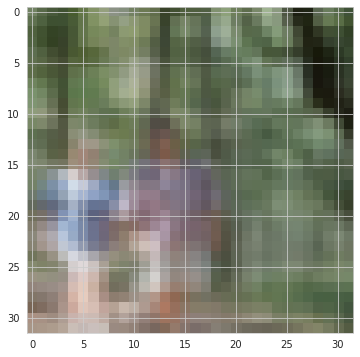

In [258]:
plt.imshow(X_test[1]);

In [259]:
classes[np.argmax(pred)]

'forest'

In [266]:
y_test[1][0]

33

In [267]:
classes[33]

'forest'